
# Real-time Bitcoin price prediction using LightGBM

This notebook demonstrates how to use a modular LightGBM pipeline to fetch, engineer, train, and evaluate real-time Bitcoin price forecasts using historical price data from the CoinGecko API.

* For a detailed explanation of the utility functions used in this notebook, refer to: LightGBM.API.md

* All logic is imported from LightGBM_utils.py.

* This notebook assumes you are connected to the internet and have installed the required packages (lightgbm, pandas, matplotlib, scikit-learn, requests).





## Why LightGBM?

* Fast & Efficient: Optimized for speed with histogram-based learning.

* Scalable: Suitable for large datasets and low-latency forecasting.

* Flexible: Handles numerical and categorical features with ease.

* Built-in Regularization: Helps prevent overfitting.

* Easy Integration: Works seamlessly with real-time data and Python pipelines.

## 1. Setup and Imports

In [49]:
import pandas as pd
from LightGBM_utils import (
    fetch_bitcoin_data,
    create_features,
    train_lightgbm,
    evaluate_model,
    plot_predictions
)

df = fetch_bitcoin_data(days=200)

In [50]:
df_raw = fetch_bitcoin_data(days=200)
df = create_features(df_raw)

## 2. Fetch Real-Time Bitcoin Price Data

In [52]:
df = create_features(df)
model, X_test, y_test = train_lightgbm(df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 157, number of used features: 5
[LightGBM] [Info] Start training from score 91275.852956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## 3. Feature Engineering

In [54]:
# Create lag, rolling and datetime-based features
df_features = create_features(df_raw)
df_features.head()

,timestamp,price,minute,hour,dayofweek,lag_1,lag_2,rolling_mean_3,rolling_std_3
2,2024-10-17,67647.544148,0,0,3,66962.219945,66049.994927,66886.586340,801.455682
3,2024-10-18,67328.105270,0,0,4,67647.544148,66962.219945,67312.623121,342.924319
4,2024-10-19,68465.619207,0,0,5,67328.105270,67647.544148,67813.756208,586.689292
5,2024-10-20,68388.871290,0,0,6,68465.619207,67328.105270,68060.865255,635.747952
6,2024-10-21,68962.829180,0,0,0,68388.871290,68465.619207,68605.773226,311.591522


## 4. Train LightGBM Model

In [56]:
# Train model and return test set predictions
model, X_test, y_test = train_lightgbm(df_features)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 159, number of used features: 5
[LightGBM] [Info] Start training from score 90976.632469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

## 5. Evaluate Model Performance

In [58]:
# Evaluate prediction performance with RMSE and MAE
rmse, mae, y_true, y_pred = evaluate_model(model, X_test, y_test)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

RMSE: 2120.84, MAE: 1429.71


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 6. Visualize Predictions

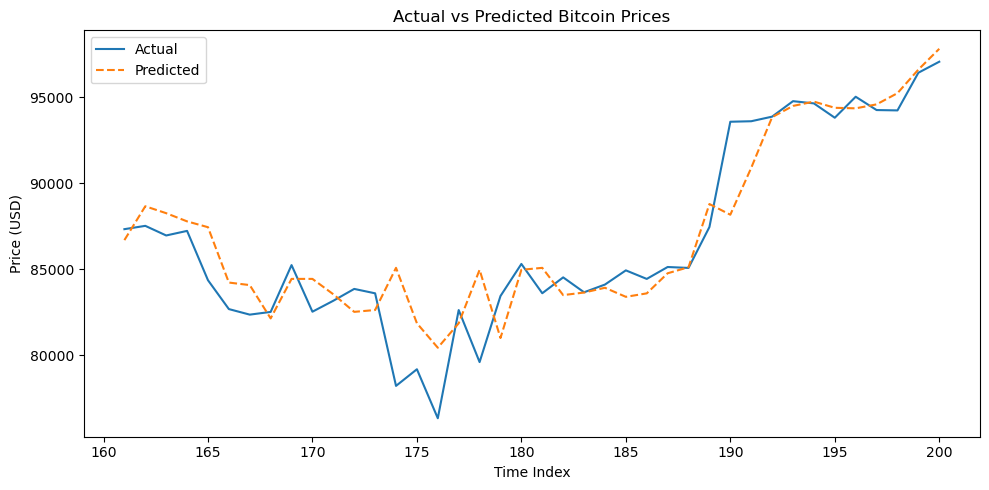

In [60]:
# Plot actual vs predicted prices
plot_predictions(y_true, y_pred)

## 7. Bonus: Feature Importance Analysis

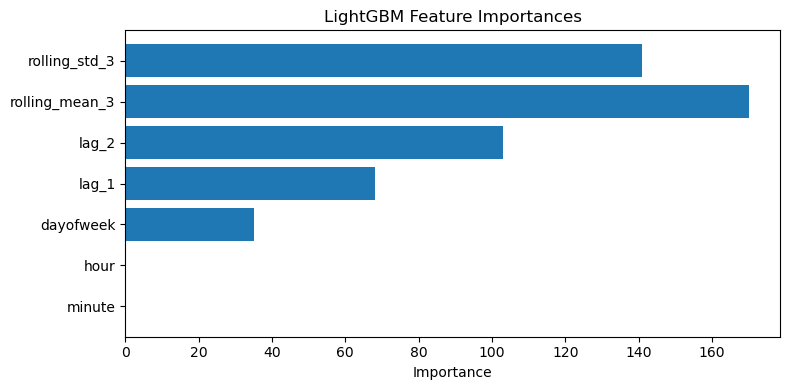

In [62]:
# Display feature importances from LightGBM model
import matplotlib.pyplot as plt

feature_names = X_test.columns
importances = model.feature_importances_

plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("LightGBM Feature Importances")
plt.tight_layout()
plt.show()

This pipeline demonstrates the use of historical Bitcoin prices and feature engineering for short-term forecasting using LightGBM.